In [1]:
import numpy as np
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt

from __future__ import unicode_literals  # Only for python2.7 and save_as unicode filename
import pydicom
from pydicom.dataset import Dataset
from pydicom.sequence import Sequence

C:\Users\tr17\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [29]:
fcmrDir=r'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\4D_Flow_Paper\fcmr202'

cineVolDir=r'\cine_vol'
cineVolniiFileName=r'\cine_vol.nii.gz'
cineVol_nii = nib.load(fcmrDir+cineVolDir+cineVolniiFileName)
cineVol_img = cineVol_nii.get_fdata()

print(cineVol_img.shape)

nX = cineVol_img.shape[0]
nY = cineVol_img.shape[1]
nZ = cineVol_img.shape[2]
nF = cineVol_img.shape[3]

dimX = cineVol_nii.header['pixdim'][1]
dimY = cineVol_nii.header['pixdim'][2]
dimZ = cineVol_nii.header['pixdim'][3]
dimF = cineVol_nii.header['pixdim'][4]

c  = np.reshape(cineVol_img, [nX, nY, nZ*nF])
print("Shape of c:", c.shape)

print("Original DICOM datatype:", "uint16")
print("Original Nifti datatype:", c.dtype)

c = c.astype("uint16")

print("Converted Nifti datatype:", c.dtype)

# cToWrite = c[:,:,650]
# cToWrite[cToWrite==-1] = 0

(43, 44, 52, 25)
Shape of c: (43, 44, 1300)
Original DICOM datatype: uint16
Original Nifti datatype: float64
Converted Nifti datatype: uint16


# z Locations

0 63.75 52


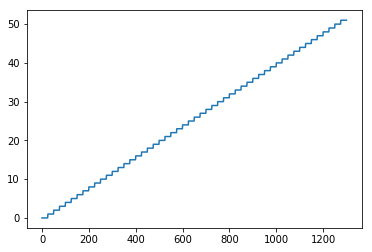

In [90]:
zLocFirst = 0 # TODO: incorporate nonzero starting point, i.e.: cineVol_nii.affine[2,3]
zLocLast = (dimZ * nZ) - dimZ
zLoc = np.linspace(zLocFirst, zLocLast, num=nZ)

zLocCurrent = np.zeros(nZ*nF)
for n in range(nZ*nF):
    zLocCurrent[n] = np.floor(n/nF)

print(zLocFirst, zLocLast, len(zLoc))
plt.plot(zLocCurrent)
plt.show()

# Definitions

In [3]:
series_unique_uid = pydicom.uid.generate_uid() # UID for dataset
VERSION = 'v1.0.0'

# File Meta

In [4]:
# File meta info data elements
file_meta = Dataset()
file_meta.FileMetaInformationGroupLength = 196                      # 210?
file_meta.FileMetaInformationVersion = b'\x00\x01'                  # transfer from kt8 dicom?
file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.4'     # xxx.7 = Secondary Capture Image Storage / xxx.4 = MR Image Storage
file_meta.MediaStorageSOPInstanceUID = series_unique_uid
file_meta.TransferSyntaxUID = '1.2.840.10008.1.2'                   # transfer from kt8 dicom?
file_meta.ImplementationClassUID = '1.2.276.0.7230010.3.0.3.6.1'    # transfer from kt8 dicom?
file_meta.ImplementationVersionName = 'dicomserver ' + VERSION

# Main Data

In [5]:
# SERIES REQUIRED FIELDS

ds = Dataset()
ds.SOPClassUID = '1.2.840.10008.5.1.4.1.1.4' # xxx.7 = Secondary Capture Image Storage / xxx.4 = MR Image Storage
ds.SeriesInstanceUID = series_unique_uid
ds.SeriesNumber = 100 # update
ds.BitsAllocated = 16

In [ ]:
# FRAME-WISE REQUIRED FIELDS

for n in range(nZ*nF)
    ds.SOPInstanceUID = pydicom.uid.generate_uid() # UID for individual slices

In [6]:
# Main data elements
# ds.SpecificCharacterSet = 'ISO_IR 100'
# ds.ImageType = ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
# ds.InstanceCreationDate = '20120821'
# ds.InstanceCreationTime = '221700'
# ds.InstanceCreatorUID = '1.2.40.0.13.1.203399489339977079628124438700844270739'

# ds.SOPInstanceUID = '1.2.40.0.13.1.238698975124950281685715042764914485226' # below
# ds.StudyDate = '20120821'
# ds.SeriesDate = '20120821'
# ds.AcquisitionDate = '20120821'
# ds.ContentDate = '20120821'
# ds.StudyTime = '173207'
# ds.SeriesTime = '182511.32000'
# ds.AcquisitionTime = '182511.32'
# ds.ContentTime = '182511.32'
# ds.AccessionNumber = ''
# ds.Modality = 'MR'
# ds.Manufacturer = 'Philips Medical Systems'
# ds.CodeValue = ''
# ds.CodingSchemeDesignator = 'DCM'
# ds.CodeMeaning = ''

# ds.StudyInstanceUID = '1.2.40.0.13.1.333311361771566580913219583914625766216'
# ds.SeriesInstanceUID = '1.2.40.0.13.1.286595144572817015845933344548631223145'
# ds.StudyID = '513842.201207030'
# ds.SeriesNumber = "1006"
# ds.AcquisitionNumber = "10"
# ds.InstanceNumber = "329"
# ds.ImagePositionPatient = ['-58.266084007661', '-188.48125967922', '225.160076310167']
# ds.ImageOrientationPatient = ['0.51319164037704', '0.85772150754928', '-0.0307911429554', '-0.0599991045892', '6.4554493292E-05', '-0.9981984496116']
# ds.FrameOfReferenceUID = '1.2.40.0.13.1.168070265634523572089252568290704983898'
# ds.TemporalPositionIdentifier = "1"
# ds.NumberOfTemporalPositions = "1"
# ds.PositionReferenceIndicator = ''
# ds.SliceLocation = "41.5999958560011"
# ds.SamplesPerPixel = 1
# ds.PhotometricInterpretation = 'MONOCHROME2'
# ds.Rows = 192
# ds.Columns = 192
# ds.PixelSpacing = ['1.97916662693023', '1.97916662693023']


In [7]:
# ds.Format = 'DICOM'
# ds.FormatVersion = 3
# ds.BitDepth = 16 # assuming uint16 images

# ds.ConversionType = 'WSD' # WSD = Workstation
# ds.TimeofSecondaryCapture = ''
# ds.SecondaryCaptureDeviceManufacturer = 'PIH Research 4D FCMR Reconstruction'
# ds.SecondaryCaptureDeviceManufacturerModelName = '1.0.0'
# ds.SecondaryCaptureDeviceSoftwareVersion = '1.0.0'


# Dicom Creation

In [8]:

# cToWrite = c[:,:,n]

# ds.PresentationLUTShape = 'IDENTITY'
ds.PixelData = cToWrite.tobytes()
ds.Rows = cToWrite.shape[0]
ds.Columns = cToWrite.shape[1]

a0 = cineVol_nii.affine[0,3]
a1 = cineVol_nii.affine[1,3]
a2 = cineVol_nii.affine[2,3]

ds.ImagePositionPatient = [str(a0),str(a1),str(a2)]
ds.ImageOrientationPatient = ['0','0','0','0','0','0']
ds.PixelSpacing = ['1.25','1.25']
ds.SpacingBetweenSlices = '1.25'


ds.file_meta = file_meta
ds.is_implicit_VR = True
ds.is_little_endian = True
ds.save_as(r'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d\dcm\testCodifyTom_mag2.dcm', write_like_original=False)

print('Finished.')

Finished.
